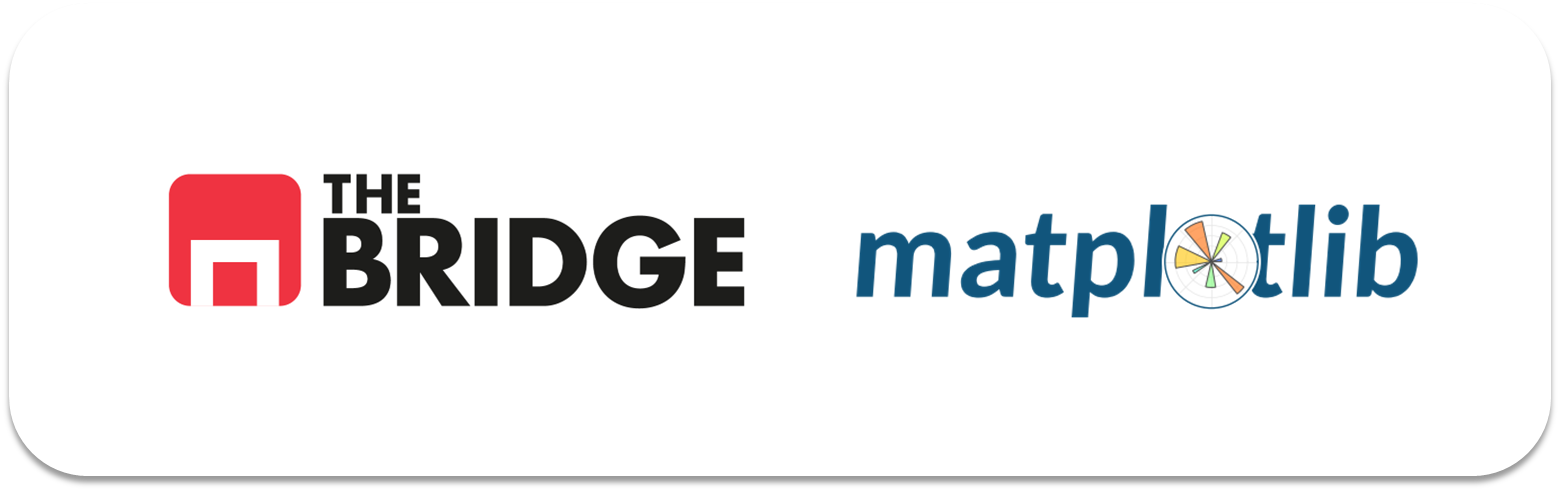

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [ ]:
# Cargamos el dataset
df_cities = pd.read_csv("./data/california_cities.csv")

# Eliminamos las filas con NaN
df_cities.dropna(inplace=True)
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

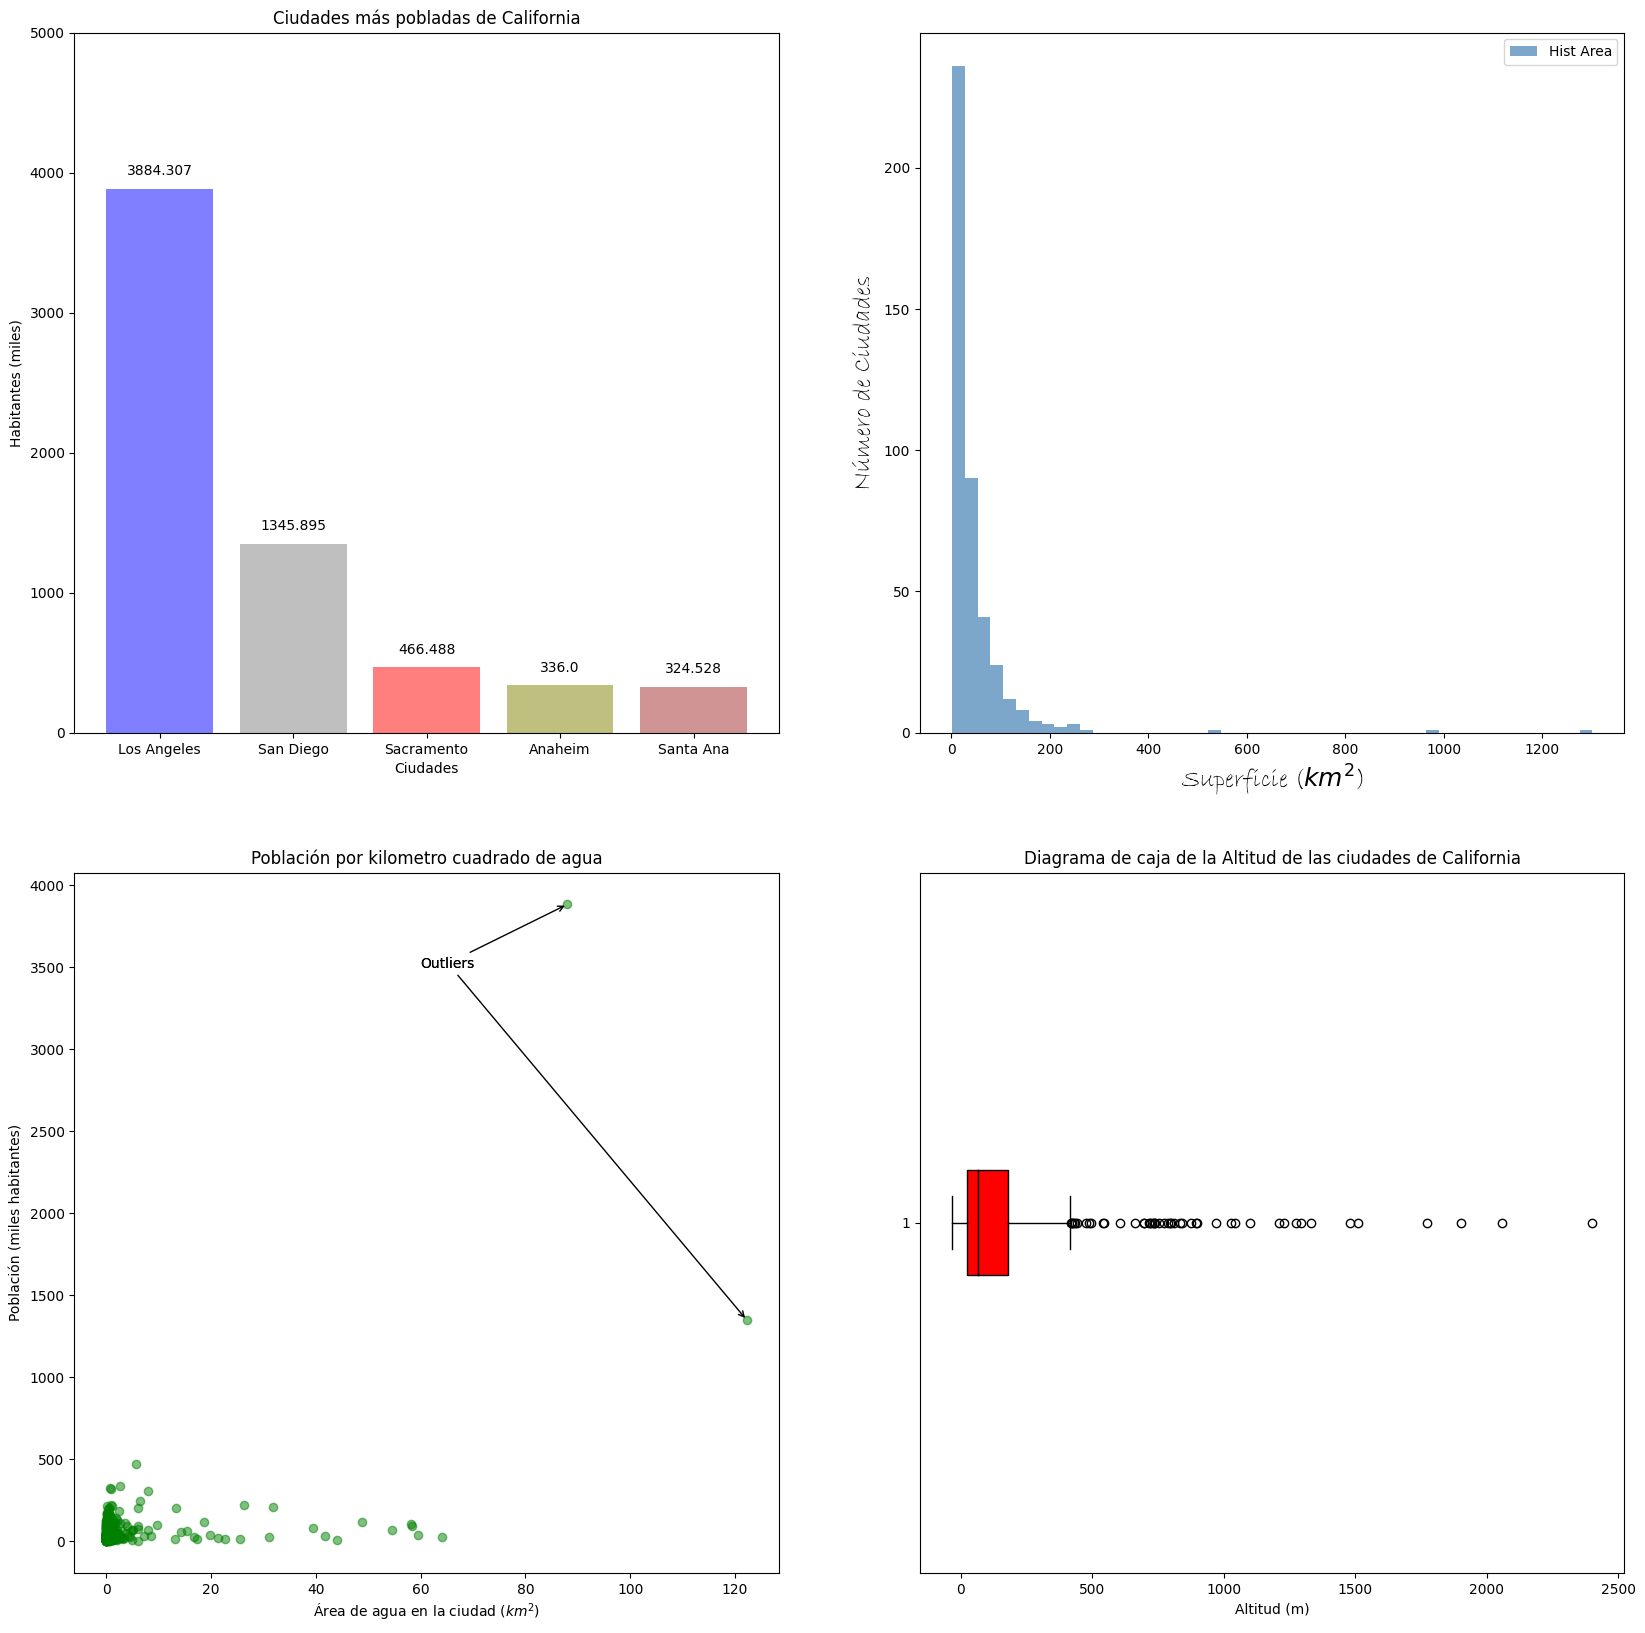

Primero los gráficos de uno en uno

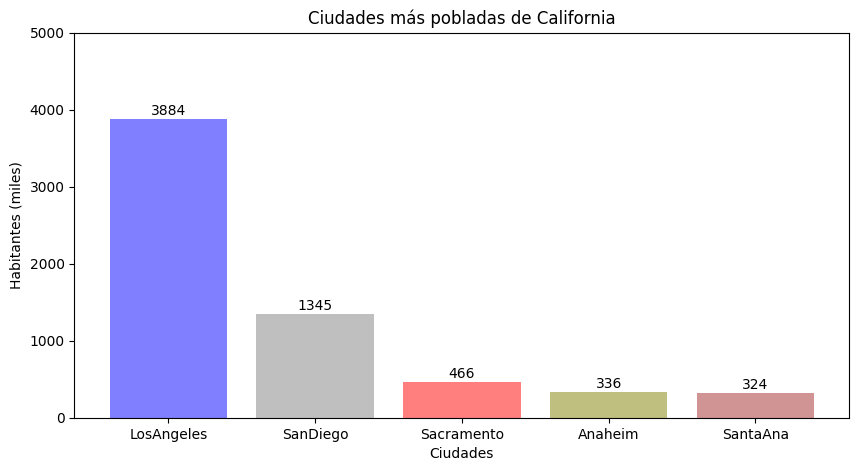

In [ ]:
# Gráfico 1: Ciudades más pobladas de California

# Obtener el top de ciudades
top_cities = df_cities[["city", "population_total"]].sort_values(by="population_total", ascending=False).head(5)

# Definir el nombre de los colores de las diferentes barras
colores = ["blue", "grey", "red", "olive", "brown"]  # azul, gris, rojo, aceituna, marrón

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 5))  # Tamaño de la figura

bars = plt.bar(top_cities["city"], top_cities["population_total"]/1000, color=colores, alpha=0.5) # Barras en miles de habitantes

# Poner el número correcto en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height +100 , f"{int(height)}", ha="center", va="center")

# Límite en el eje Y
plt.ylim(0, 5000)  

# Personalizar título y etiquetas
plt.title("Ciudades más pobladas de California")
plt.xlabel("Ciudades")
plt.ylabel("Habitantes (miles)")

# Mostrar gráfico
plt.show()

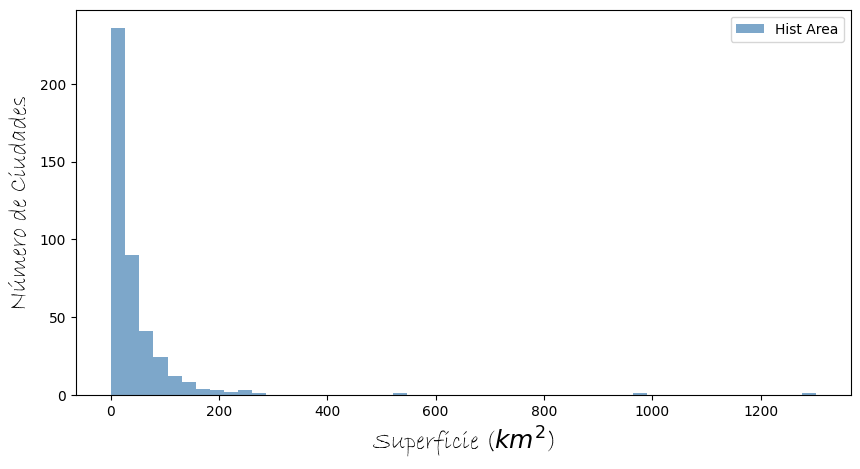

In [ ]:
# Gráfico 2: Histograma de la superficie (en km²)

# Definir como sera el tipo de letra
fuente = {
    "font": "Bradley Hand itc", 
    "size":"18"
    }

# Crear la figura
plt.figure(figsize=(10, 5))

# Añadir el histograma
plt.hist(df_cities["area_total_km2"],color="steelblue", bins = 50, label="Hist Area", alpha = 0.7)

# Leyenda
plt.legend()

# Etiquetas
plt.xlabel("Superficie ($km^2$)", fontdict=fuente)
plt.ylabel("Número de Ciudades", fontdict= fuente)

plt.show()

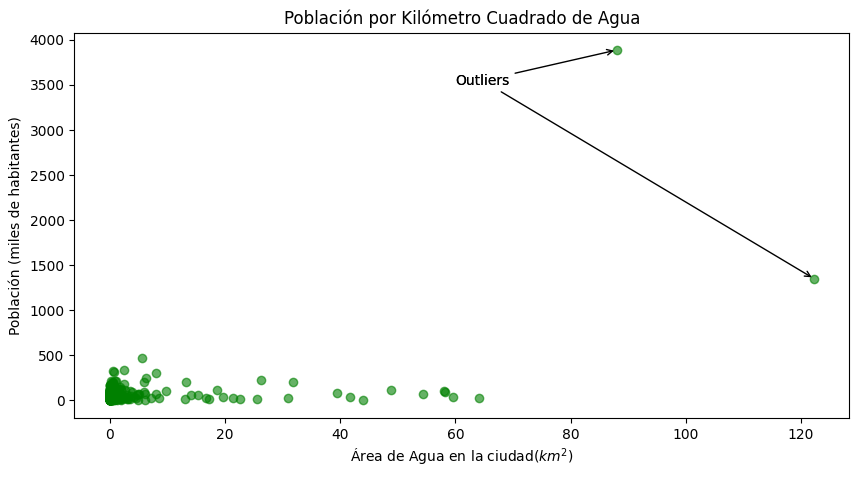

In [ ]:
# Gráfico 3: Gráfico de dispersión - Población por kilómetro cuadrado de agua

# Obtener los dos outliers
outliers = df_cities.loc[df_cities.population_total > 1000000]

# Crear la figura
plt.figure(figsize=(10, 5))

# Hacer el scatter plot en miles de habitantes
plt.scatter(df_cities["area_water_km2"], df_cities["population_total"]/1000, color="green", alpha=0.6)

# Diccionario con las propiedades de la flecha
props_flecha = {
    "arrowstyle": "->",
}

# Hacer las flechas
plt.annotate("Outliers", xy = (outliers["area_water_km2"][:1], outliers["population_total"][:1]/1000), xytext = (60, 3500),
            arrowprops = props_flecha)
plt.annotate("Outliers", xy = (outliers["area_water_km2"][1:2], outliers["population_total"][1:2]/1000), xytext = (60, 3500),
            arrowprops = props_flecha)

#Título y etiquetas
plt.title("Población por Kilómetro Cuadrado de Agua")
plt.xlabel("Área de Agua en la ciudad($km^2$)")
plt.ylabel("Población (miles de habitantes)")

plt.show()

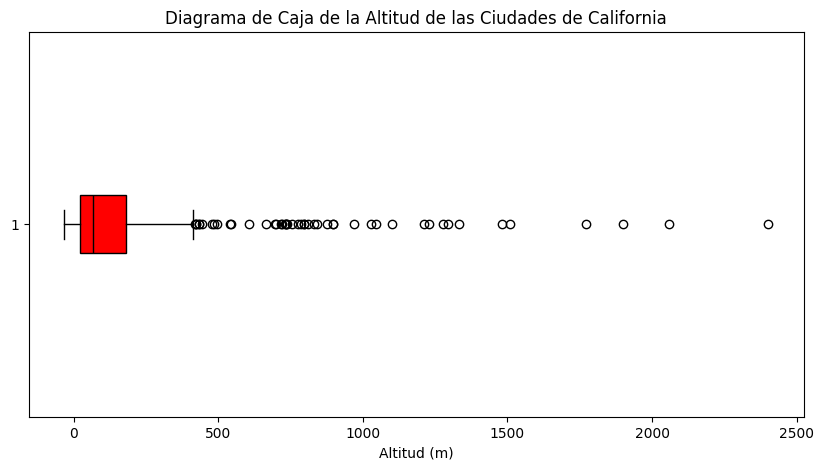

In [ ]:
# Gráfico 4: Diagrama de caja - Altitud de las ciudades

# Crear la figura
plt.figure(figsize=(10, 5))

# Añadir el boxplot
plt.boxplot(df_cities["elevation_m"], vert=False, 
            patch_artist=True, boxprops=dict(facecolor="red", edgecolor = "black"),
             medianprops=dict(color="black")  )

# Título y etiquetas
plt.title("Diagrama de Caja de la Altitud de las Ciudades de California")
plt.xlabel("Altitud (m)")

plt.show()

Todo junto

c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1465: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


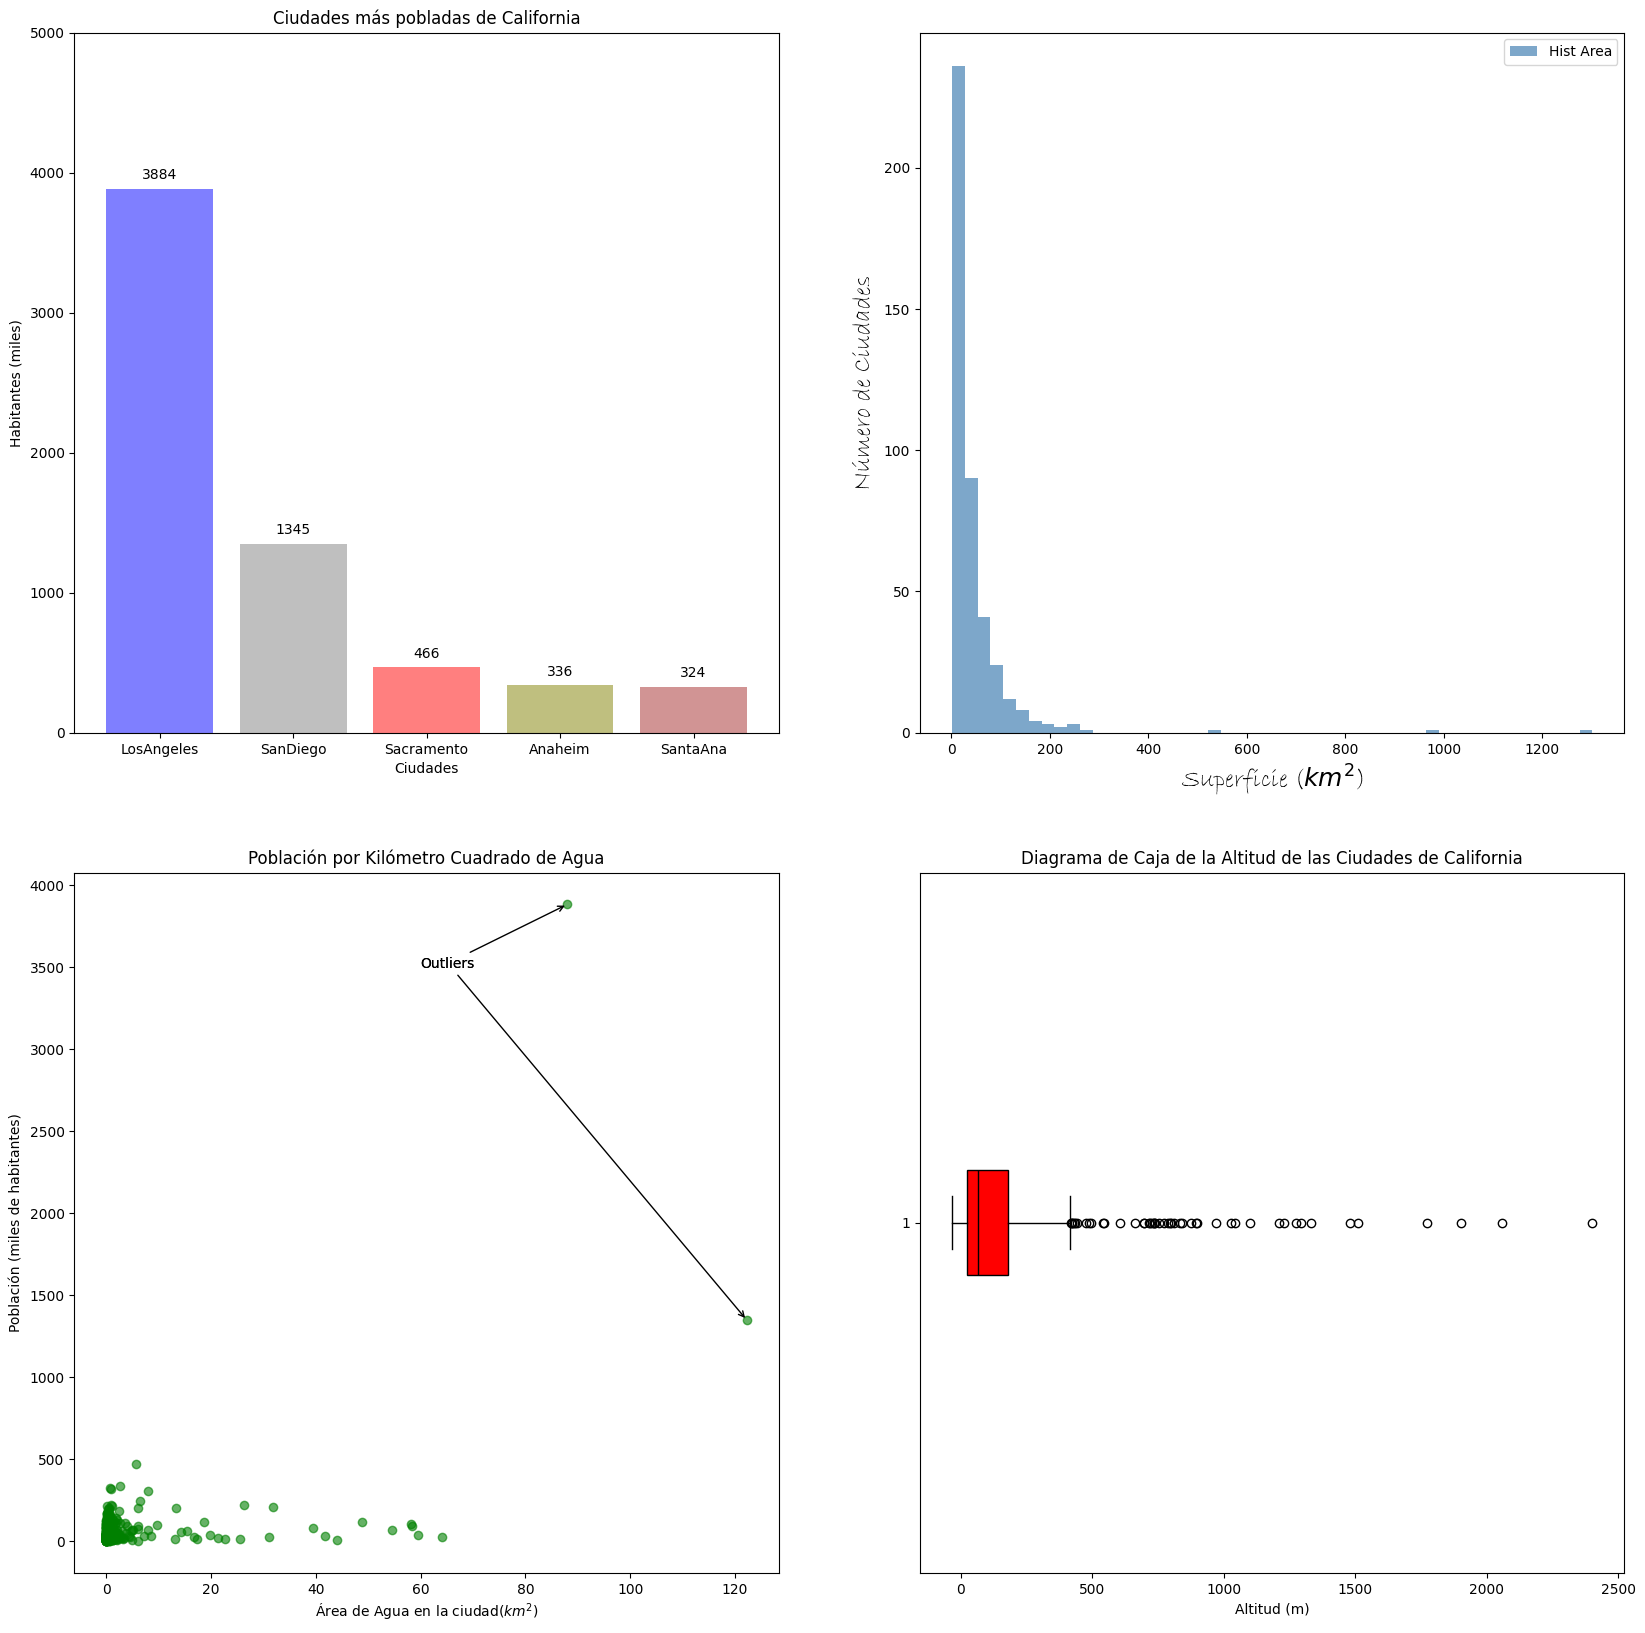

In [ ]:
# Crear la figura de 2x2 y tamaño grande
fig, ax = plt.subplots(2,2, figsize=(20, 20))

# Gráfico 1: repetido pero añadiendo todo a ax[0,0] y cambiando algun método
bars = ax[0,0].bar(top_cities["city"], top_cities["population_total"]/1000, color=colores, alpha=0.5)

for bar in bars:
    height = bar.get_height()
    ax[0,0].text(bar.get_x() + bar.get_width() / 2, height +100 , f"{int(height)}", ha="center", va="center")

ax[0,0].set_ylim(0, 5000)  # Límite en el eje Y

# Personalizar título y etiquetas
ax[0,0].set_title("Ciudades más pobladas de California")
ax[0,0].set_xlabel("Ciudades")
ax[0,0].set_ylabel("Habitantes (miles)")

# Gráfico 2 repetido pero añadiendo todo a ax[0,1] y cambiando algun método
ax[0,1].hist(df_cities["area_total_km2"],color="steelblue", bins = 50, label="Hist Area",alpha=0.7)
ax[0,1].legend()
ax[0,1].set_xlabel("Superficie ($km^2$)", fontdict=fuente)
ax[0,1].set_ylabel("Número de Ciudades", fontdict= fuente)

# Gráfico 3 repetido pero añadiendo todo a ax[1,0] y cambiando algun método
ax[1,0].scatter(df_cities["area_water_km2"], df_cities["population_total"]/1000, color="green", alpha=0.6)
props_flecha = {
    "arrowstyle": "->",
}
ax[1,0].annotate("Outliers", xy = (outliers["area_water_km2"][:1], outliers["population_total"][:1]/1000), xytext = (60, 3500),
            arrowprops = props_flecha)
ax[1,0].annotate("Outliers", xy = (outliers["area_water_km2"][1:2], outliers["population_total"][1:2]/1000), xytext = (60, 3500),
            arrowprops = props_flecha)
ax[1,0].set_title("Población por Kilómetro Cuadrado de Agua")
ax[1,0].set_xlabel("Área de Agua en la ciudad($km^2$)")
ax[1,0].set_ylabel("Población (miles de habitantes)")

# Gráfico 4 repetido pero añadiendo todo a ax[1,1] y cambiando algun método
ax[1,1].boxplot(df_cities["elevation_m"], vert=False, 
            patch_artist=True, boxprops=dict(facecolor="red", edgecolor = "black"),
             medianprops=dict(color="black")  )
ax[1,1].set_title("Diagrama de Caja de la Altitud de las Ciudades de California")
ax[1,1].set_xlabel("Altitud (m)")

# Guardar la figura: siguiente apartado
plt.savefig("imagen_practica_sprint8_ud1.png") 

plt.show()

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [ ]:
#plt.savefig("imagen_practica_sprint8_ud1.png")  


<Figure size 640x480 with 0 Axes>